In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2
from sklearn.datasets import make_regression
from sklearn.ensemble import ExtraTreesClassifier
from scipy.stats import spearmanr

In [2]:
df = pd.read_csv('p2_mod.csv')

In [3]:
df.shape
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [5]:
x= df.iloc[:,0:23].values

In [6]:
y= df.iloc[:,23].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 0, n_jobs = -1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on Test Set: ")
    print(accuracy_score(y_test,y_pred))

In [8]:
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on Test Set: 
0.8156666666666667


In [9]:
print(x)

[[ 20000      2      2 ...      0      0      0]
 [120000      2      2 ...   1000      0   2000]
 [ 90000      2      2 ...   1000   1000   5000]
 ...
 [ 30000      1      2 ...   4200   2000   3100]
 [ 80000      1      3 ...   1926  52964   1804]
 [ 50000      1      2 ...   1000   1000   1000]]


In [10]:
print(y)

[1 1 0 ... 1 1 1]


In [11]:
forPCC= SelectKBest(score_func=f_regression, k=10)

In [12]:
XselforPCC= forPCC.fit_transform(x, y)
print(XselforPCC)
print(XselforPCC.shape)

[[ 20000      2      2 ...      0    689      0]
 [120000     -1      2 ...      0   1000   1000]
 [ 90000      0      0 ...   1518   1500   1000]
 ...
 [ 30000      4      3 ...      0      0   4200]
 [ 80000      1     -1 ...  85900   3409   1926]
 [ 50000      0      0 ...   2078   1800   1000]]
(30000, 10)


In [13]:
newdf=pd.DataFrame(XselforPCC)
print(newdf)

            0  1  2  3  4  5  6      7      8     9
0       20000  2  2 -1 -1 -2 -2      0    689     0
1      120000 -1  2  0  0  0  2      0   1000  1000
2       90000  0  0  0  0  0  0   1518   1500  1000
3       50000  0  0  0  0  0  0   2000   2019  1100
4       50000 -1  0 -1  0  0  0   2000  36681  9000
...       ... .. .. .. .. .. ..    ...    ...   ...
29995  220000  0  0  0  0  0  0   8500  20000  3047
29996  150000 -1 -1 -1 -1  0  0   1837   3526   129
29997   30000  4  3  2 -1  0  0      0      0  4200
29998   80000  1 -1  0  0  0 -1  85900   3409  1926
29999   50000  0  0  0  0  0  0   2078   1800  1000

[30000 rows x 10 columns]


In [14]:
newdf1=pd.DataFrame(y)

In [15]:
new_dataset = pd.concat([newdf, newdf1], axis=1)

In [16]:
print(new_dataset)

            0  1  2  3  4  5  6      7      8     9  0
0       20000  2  2 -1 -1 -2 -2      0    689     0  1
1      120000 -1  2  0  0  0  2      0   1000  1000  1
2       90000  0  0  0  0  0  0   1518   1500  1000  0
3       50000  0  0  0  0  0  0   2000   2019  1100  0
4       50000 -1  0 -1  0  0  0   2000  36681  9000  0
...       ... .. .. .. .. .. ..    ...    ...   ... ..
29995  220000  0  0  0  0  0  0   8500  20000  3047  0
29996  150000 -1 -1 -1 -1  0  0   1837   3526   129  0
29997   30000  4  3  2 -1  0  0      0      0  4200  1
29998   80000  1 -1  0  0  0 -1  85900   3409  1926  1
29999   50000  0  0  0  0  0  0   2078   1800  1000  1

[30000 rows x 11 columns]


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(newdf, newdf1, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# x= new_dataset.iloc[:,0:9].values
# y= new_dataset.iloc[:,9].values
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
print(newdf1)

       0
0      1
1      1
2      0
3      0
4      0
...   ..
29995  0
29996  0
29997  1
29998  1
29999  1

[30000 rows x 1 columns]


In [22]:
!pip install mlxtend

In [23]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
#import mlrose
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
import seaborn as sns
import joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from sklearn.ensemble import RandomForestClassifier as rfc
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [24]:
sbs = SFS(#knn(n_neighbors=3),
           #rfc(n_jobs=8),
           LGR(max_iter=4000),
           k_features='best', 
           forward=False, 
           floating=False, 
           verbose=2,
           #scoring = 'neg_mean_squared_error',  # sklearn regressors
           scoring='accuracy',  # sklearn classifiers
           cv=3)
sbs = sbs.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d ar

In [25]:
sbs.k_feature_idx_

(1,)

In [26]:
df = pd.DataFrame.from_dict(sbs.get_metric_dict()).T
df = df[["feature_idx","avg_score"]]

In [27]:
df

,feature_idx,avg_score
10,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)",0.809333
9,"(0, 1, 3, 4, 5, 6, 7, 8, 9)",0.81075
8,"(0, 1, 3, 4, 5, 6, 8, 9)",0.81175
7,"(0, 1, 3, 4, 5, 6, 8)",0.812
6,"(0, 1, 3, 4, 5, 6)",0.811875
5,"(0, 1, 3, 4, 6)",0.811875
4,"(0, 1, 3, 4)",0.811833
3,"(0, 1, 4)",0.811625
2,"(0, 1)",0.812208
1,"(1,)",0.819667


In [31]:
sbs.subsets_

{1: {'avg_score': 0.8196666666666667,
  'cv_scores': array([0.823625, 0.819125, 0.81625 ]),
  'feature_idx': (1,),
  'feature_names': ('1',)},
 2: {'avg_score': 0.8122083333333333,
  'cv_scores': array([0.813375, 0.81075 , 0.8125  ]),
  'feature_idx': (0, 1),
  'feature_names': ('0', '1')},
 3: {'avg_score': 0.8116249999999999,
  'cv_scores': array([0.80975 , 0.8125  , 0.812625]),
  'feature_idx': (0, 1, 4),
  'feature_names': ('0', '1', '4')},
 4: {'avg_score': 0.8118333333333333,
  'cv_scores': array([0.809125, 0.81175 , 0.814625]),
  'feature_idx': (0, 1, 3, 4),
  'feature_names': ('0', '1', '3', '4')},
 5: {'avg_score': 0.811875,
  'cv_scores': array([0.809125, 0.811625, 0.814875]),
  'feature_idx': (0, 1, 3, 4, 6),
  'feature_names': ('0', '1', '3', '4', '6')},
 6: {'avg_score': 0.811875,
  'cv_scores': array([0.809125, 0.811625, 0.814875]),
  'feature_idx': (0, 1, 3, 4, 5, 6),
  'feature_names': ('0', '1', '3', '4', '5', '6')},
 7: {'avg_score': 0.8119999999999999,
  'cv_scores':

Selected Features ID : (1,)


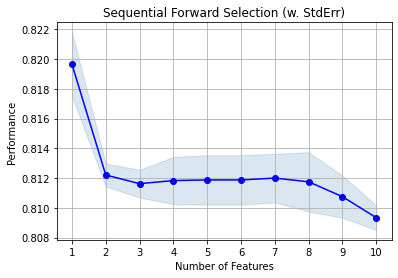

In [32]:
fig = plot_sfs(sbs.get_metric_dict(), kind='std_err')
# print("Selected Features :", sbs.k_feature_names_)
print("Selected Features ID :", sbs.k_feature_idx_)
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [33]:
newdf = pd.DataFrame(X_train)
print(newdf)

              0         1         2         3         4         5         6  \
0     -0.672359  0.014796  0.109694  0.141120  0.188700  0.234055  0.250571   
1     -1.057768  0.014796  0.109694  0.141120  0.188700  0.234055  0.250571   
2      0.098459  0.014796  0.109694 -0.698046 -0.667404 -0.648616 -0.617206   
3     -0.826523  0.014796  0.109694  0.141120  0.188700  0.234055  0.250571   
4     -0.286950  0.014796  0.109694  0.141120  0.188700  0.234055  0.250571   
...         ...       ...       ...       ...       ...       ...       ...   
23995 -0.903605  0.014796  0.109694  0.141120  0.188700  0.234055  0.250571   
23996  0.252623  1.790286  1.779631  1.819451  1.900908  1.999396  1.986124   
23997 -0.903605 -1.760694 -1.560243 -1.537212 -1.523508 -1.531286 -1.484983   
23998 -0.749441  0.014796  0.109694  0.141120  0.188700  1.999396  1.986124   
23999 -0.055704 -1.760694 -1.560243 -1.537212 -1.523508 -1.531286 -1.484983   

              7         8         9  
0     -0.1268

In [34]:
selected = list(sbs.k_feature_idx_)

In [35]:
x_bfe = newdf.iloc[:, selected]
print(x_bfe)

              1
0      0.014796
1      0.014796
2      0.014796
3      0.014796
4      0.014796
...         ...
23995  0.014796
23996  1.790286
23997 -1.760694
23998  0.014796
23999 -1.760694

[24000 rows x 1 columns]


In [36]:
bfe_X_train, bfe_X_test, bfe_y_train, bfe_y_test = train_test_split(x_bfe, y_train, test_size = 0.2, random_state = 42)

SVM

In [37]:
from sklearn import svm
from sklearn.svm import SVC

In [38]:
svm = svm.SVC()
svm.fit(bfe_X_train, bfe_y_train)
svm.score(bfe_X_train, bfe_y_train)*100

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


82.13541666666667

In [39]:
svm_score = svm.score(bfe_X_test, bfe_y_test)*100
print("SVM Accuracy:", svm_score)

SVM Accuracy: 81.29166666666666


KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
classifier = KNeighborsClassifier(n_neighbors = 81)
classifier.fit(bfe_X_train, bfe_y_train)
knn.fit(bfe_X_train, bfe_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [41]:
score = knn.score(bfe_X_test, bfe_y_test)
print("KNN Algorithm Score:", score*100)

KNN Algorithm Score: 78.14583333333334


DT

In [42]:
from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(bfe_X_train, bfe_y_train)

DecisionTreeClassifier()

In [43]:
j=dclf.score(bfe_X_test, bfe_y_test)
print("Decision Tree Algorithm Score:",j*100)

Decision Tree Algorithm Score: 81.29166666666666


RF

In [44]:
def run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test):
    clf = RandomForestClassifier(n_estimators= 100, random_state = 42, n_jobs = -1)
    clf.fit(bfe_X_train, bfe_y_train)
    y_pred = clf.predict(bfe_X_test)
    score = accuracy_score(bfe_y_test,y_pred)*100
    print("Random Forest Accuracy:", score)

In [45]:
run_randomForest(bfe_X_train, bfe_y_train,bfe_X_test, bfe_y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest Accuracy: 81.29166666666666


LR

In [46]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(bfe_X_train, bfe_y_train)
lr = model.score(bfe_X_test, bfe_y_test)*100
print("Logistic Regression Accuracy:", lr)

Logistic Regression Accuracy: 81.29166666666666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
